In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
file_path = './Dataset/OLA_DataSet.xlsx'

df = pd.read_excel(file_path)

In [3]:
df.isna().sum()

Date                              0
Time                              0
Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
V_TAT                         39057
C_TAT                         39057
Canceled_Rides_by_Customer    92525
Canceled_Rides_by_Driver      84590
Incomplete_Rides              39057
Incomplete_Rides_Reason       99098
Booking_Value                     0
Payment_Method                39057
Ride_Distance                     0
Driver_Ratings                39057
Customer_Rating               39057
Vehicle Images                    0
dtype: int64

In [4]:
# changing dtype

Acc_type = {'Date': 'datetime64[ns]', 'Time': 'datetime64[ns]', 'Booking_ID': 'string', 'Booking_Status': 'category', 'Customer_ID' : 'string',
       'Vehicle_Type': 'Category', 'Pickup_Location': 'string', 'Drop_Location': 'string', 'V_TAT': 'int', 'C_TAT': 'int',
       'Canceled_Rides_by_Customer': 'string', 'Canceled_Rides_by_Driver' : 'strnig',
       'Incomplete_Rides': 'category', 'Incomplete_Rides_Reason': 'category', 'Booking_Value': 'int32',
       'Payment_Method': 'category', 'Ride_Distance': 'int32', 'Driver_Ratings': 'category', 'Customer_Rating': 'category'}

df = df.convert_dtypes(Acc_type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        103024 non-null  datetime64[ns]
 1   Time                        103024 non-null  object        
 2   Booking_ID                  103024 non-null  string        
 3   Booking_Status              103024 non-null  string        
 4   Customer_ID                 103024 non-null  string        
 5   Vehicle_Type                103024 non-null  string        
 6   Pickup_Location             103024 non-null  string        
 7   Drop_Location               103024 non-null  string        
 8   V_TAT                       63967 non-null   Int64         
 9   C_TAT                       63967 non-null   Int64         
 10  Canceled_Rides_by_Customer  10499 non-null   string        
 11  Canceled_Rides_by_Driver    18434 non-n

In [5]:
# checking for duplicates 

df.duplicated().sum()

np.int64(0)

In [6]:
# handling null values for ride status column
 
df['Incomplete_Rides'] = df.apply(
    lambda x: 'incomplete' if (pd.isna(x['Incomplete_Rides'])) | (x['Incomplete_Rides'] == 'Yes')
              else 'complete', 
    axis=1
)
df['Incomplete_Rides'].value_counts()

Incomplete_Rides
complete      60041
incomplete    42983
Name: count, dtype: int64

# Validation

In [17]:
numeric_cols = df.select_dtypes(include='number')
for col in numeric_cols:
    print(col, df[col].min(), df[col].max())

V_TAT 35 308
C_TAT 25 145
Booking_Value 100 2999
Ride_Distance 0 49
Driver_Ratings 3.0 5.0
Customer_Rating 3.0 5.0


,Date
0,2024-07-26 14:00:00
1,2024-07-25 22:20:00
2,2024-07-30 19:59:00
3,2024-07-22 03:15:00
4,2024-07-02 09:02:00
...,...
103019,2024-07-31 09:06:00
103020,2024-07-31 15:12:00
103021,2024-07-31 13:59:00
103022,2024-07-31 14:56:00


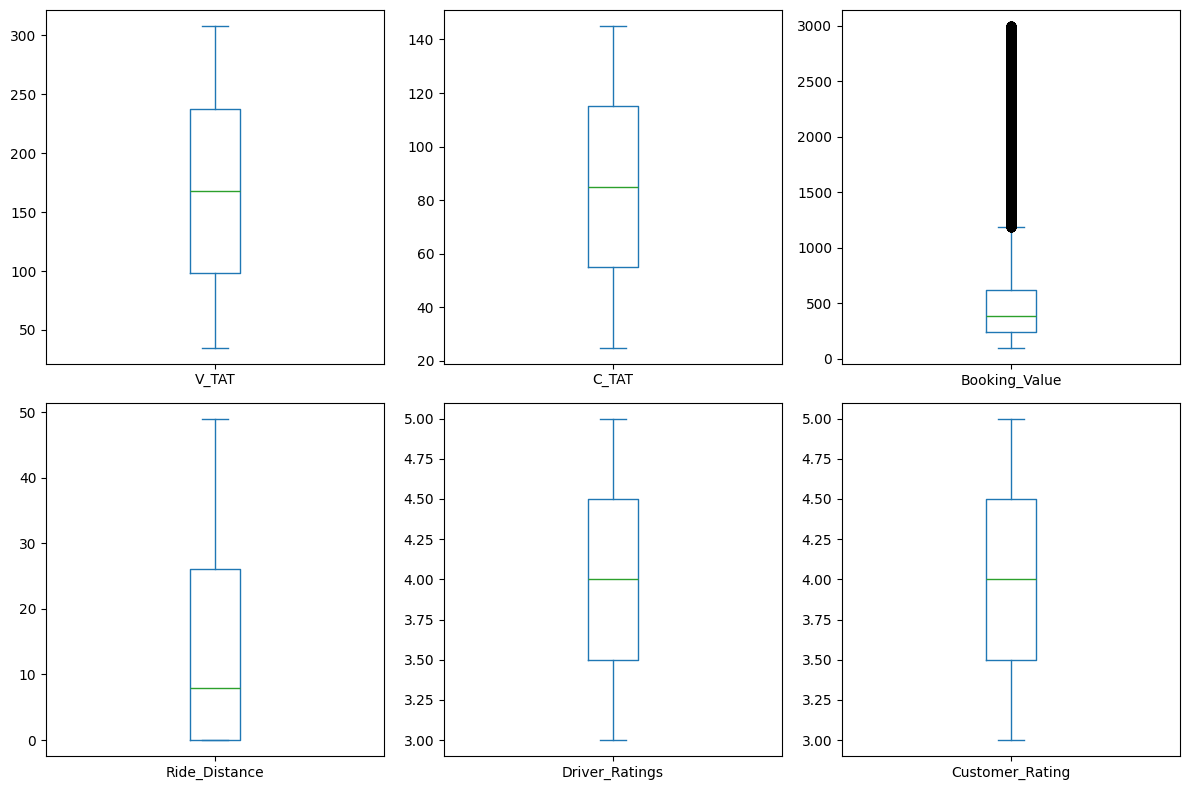

In [ ]:
df.select_dtypes(include='number').plot(
    kind='box', 
    subplots=True, 
    layout=(2, 3), 
    figsize=(12, 8)
)
plt.tight_layout()
plt.show()

# Transformation

In [9]:
# 1. remove time from date columns
df['Date'] = pd.to_datetime(df['Date']).dt.date


In [10]:
# 2. find actual reason for cancellation
reason_cols = ['Canceled_Rides_by_Driver', 'Canceled_Rides_by_Customer', 'Incomplete_Rides_Reason']
temp_reason = df[reason_cols].max(axis=1)

df['cancellation_reason'] = temp_reason.fillna(df['Booking_Status'])
df

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,...,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images,cancellation_reason
0,2024-07-26,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,<NA>,<NA>,...,Personal & Car related issue,incomplete,<NA>,444,<NA>,0,<NA>,<NA>,https://cdn-icons-png.flaticon.com/128/14183/1...,Personal & Car related issue
1,2024-07-25,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203,30,...,<NA>,complete,<NA>,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...,Success
2,2024-07-30,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238,130,...,<NA>,complete,<NA>,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...,Success
3,2024-07-22,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,<NA>,<NA>,...,<NA>,incomplete,<NA>,384,<NA>,0,<NA>,<NA>,https://cdn-icons-png.flaticon.com/128/6839/68...,Driver is not moving towards pickup location
4,2024-07-02,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252,80,...,<NA>,complete,<NA>,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...,Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103019,2024-07-31,09:06:00,CNR9488489435,Success,CID371654,Prime Plus,Richmond Town,Varthur,245,35,...,<NA>,complete,<NA>,111,Cash,41,3.6,3.8,https://cdn-icons-png.flaticon.com/128/11409/1...,Success
103020,2024-07-31,15:12:00,CNR3151743100,Success,CID334158,Auto,Vijayanagar,Richmond Town,84,145,...,<NA>,complete,<NA>,1097,UPI,17,4.3,3.3,https://cdn-icons-png.flaticon.com/128/16526/1...,Success
103021,2024-07-31,13:59:00,CNR1286151233,Success,CID113188,Prime SUV,Bannerghatta Road,JP Nagar,35,75,...,<NA>,complete,<NA>,2201,Cash,37,3.6,3.2,https://cdn-icons-png.flaticon.com/128/9983/99...,Success
103022,2024-07-31,14:56:00,CNR2027162035,Success,CID118301,eBike,Indiranagar,Magadi Road,210,140,...,<NA>,complete,<NA>,267,UPI,47,3.4,3.1,https://cdn-icons-png.flaticon.com/128/6839/68...,Success


(Canceled_Rides_by_Customer
 Driver is not moving towards pickup location    3175
 Driver asked to cancel                          2670
 Change of plans                                 2081
 AC is Not working                               1568
 Wrong Address                                   1005
 Name: count, dtype: Int64,
 Canceled_Rides_by_Driver
 Personal & Car related issue           6542
 Customer related issue                 5413
 Customer was coughing/sick             3654
 More than permitted people in there    2825
 Name: count, dtype: Int64,
 Incomplete_Rides_Reason
 Customer Demand      1601
 Vehicle Breakdown    1591
 Other Issue           734
 Name: count, dtype: Int64,
 Incomplete_Rides
 complete      60041
 incomplete    42983
 Name: count, dtype: int64)

# Outlier's and Distribution

In [12]:
df.drop(columns=['Booking_ID', 'Vehicle Images', 'Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver', 'Booking_Status', 'Incomplete_Rides_Reason'], inplace=True)

Date                       0
Time                       0
Customer_ID                0
Vehicle_Type               0
Pickup_Location            0
Drop_Location              0
V_TAT                  39057
C_TAT                  39057
Incomplete_Rides           0
Booking_Value              0
Payment_Method         39057
Ride_Distance              0
Driver_Ratings         39057
Customer_Rating        39057
cancellation_reason        0
dtype: int64

# DataCleaning & Preprocessing
●Handle missing/inconsistent values. 

●Convert datatypes and standardize formats. 

●Create derived features if necessary for better insights. 



# SQL Query Development

●Write queries to extract insights(e.g.,ridetrends, cancellations, ratings).

●Optimize queries for performance and accuracy.

●Validate results against the dataset.
